In [3]:
!pip install spacy

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import spacy
!pip install -U spacy
!python -m spacy download en_core_web_sm
m=spacy.load('en_core_web_sm')
doc = m("This is a sentence.")

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 12.8/12.8 MB 749.4 kB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [6]:
m.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [7]:
m.disable_pipes('tagger', 'parser')

['tagger', 'parser']

In [8]:
import spacy 
nlp = spacy.load('en_core_web_sm')
doc = nlp("He went to play basketball")
for token in doc:
    print(token.text, "-", token.pos_)

He - PRON
went - VERB
to - PART
play - VERB
basketball - NOUN


In [9]:
for token in doc:
    print(token.text, "-", token.dep_)

He - nsubj
went - ROOT
to - aux
play - advcl
basketball - dobj


In [17]:
doc = m("This is the part of tasks in NLP Course. Named Entity Recognition using spaCy")
for ent in doc.ents:
    print(ent.text, ent.label_)

NLP Course ORG


C:\Users\harsh\AppData\Roaming\Python\Python310\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [16]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [21]:
sentence = [("the","DT"),("little","JJ"),("Yellow","JJ"),("Dog","NN")]

In [22]:
grammar = "Np:{<DT>?<JJ>*<NN>}"
#production from CFG for NP and VP

In [23]:
cp=nltk.RegexpParser(grammar)

In [24]:
result=cp.parse(sentence)

In [25]:
print(result)

(S (Np the/DT little/JJ Yellow/JJ Dog/NN))


In [26]:
result.draw()

In [29]:
chunked_sentence = '(S (NP this tree) (VP (V is) (AdjP pretty)))'

In [30]:
from nltk.tree import Tree
from IPython.display import display
tree = Tree.fromstring(str(chunked_sentence))

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 67.1/67.1 kB 202.4 kB/s eta 0:00:00


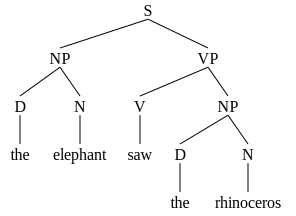

In [31]:
!pip install svgling
import svgling
svgling.draw_tree(("S", ("NP", ("D", "the"), ("N", "elephant")), ("VP", ("V", "saw"), ("NP", ("D", "the"), ("N", "rhinoceros")))))

In [32]:
#sentiment classifier using tfidf

In [36]:
#https://ai.stanford.edu/~amaas/data/sentiment/


In [1]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

In [2]:

 url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")
movies = soup.select('td.titleColumn')
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value')
        for b in soup.select('td.posterColumn span[name=ir]')]

In [3]:
list = []
for index in range(0, len(movies)):
    movie_string = movies[index].get_text()
    movie = (' '.join(movie_string.split()).replace('.', ''))
    movie_title = movie[len(str(index))+1:-7]
    year = re.search('\((.*?)\)', movie_string).group(1)
    place = movie[:len(str(index))-(len(movie))]
    data = {"place": place,
            "movie_title": movie_title,
            "rating": ratings[index],
            "year": year,
            "star_cast": crew[index],
            }
    list.append(data)

In [4]:
for movie in list:
    print(movie['place'], '-', movie['movie_title'], '('+movie['year'] +
          ') -', 'Starring:', movie['star_cast'], movie['rating'])

1 - The Shawshank Redemption (1994) - Starring: Frank Darabont (dir.), Tim Robbins, Morgan Freeman 9.235872675236772
2 - The Godfather (1972) - Starring: Francis Ford Coppola (dir.), Marlon Brando, Al Pacino 9.155773420833434
3 - The Dark Knight (2008) - Starring: Christopher Nolan (dir.), Christian Bale, Heath Ledger 8.992031585573384
4 - The Godfather Part II (1974) - Starring: Francis Ford Coppola (dir.), Al Pacino, Robert De Niro 8.9837887975875
5 - 12 Angry Men (1957) - Starring: Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb 8.9535601167433
6 - Schindler's List (1993) - Starring: Steven Spielberg (dir.), Liam Neeson, Ralph Fiennes 8.940469294267531
7 - The Lord of the Rings: The Return of the King (2003) - Starring: Peter Jackson (dir.), Elijah Wood, Viggo Mortensen 8.933066664124384
8 - Pulp Fiction (1994) - Starring: Quentin Tarantino (dir.), John Travolta, Uma Thurman 8.845951520230068
9 - The Lord of the Rings: The Fellowship of the Ring (2001) - Starring: Peter Jackson (dir.)

In [7]:
df = pd.DataFrame(list)
df.to_csv('movies.csv',index=False)

In [8]:
#Import csv file using the read_csv function

In [9]:
import pandas as pd
data = pd.read_csv("movies.csv")
data.head()

,place,movie_title,rating,year,star_cast
0,1,The Shawshank Redemption,9.235873,1994,"Frank Darabont (dir.), Tim Robbins, Morgan Fre..."
1,2,The Godfather,9.155773,1972,"Francis Ford Coppola (dir.), Marlon Brando, Al..."
2,3,The Dark Knight,8.992032,2008,"Christopher Nolan (dir.), Christian Bale, Heat..."
3,4,The Godfather Part II,8.983789,1974,"Francis Ford Coppola (dir.), Al Pacino, Robert..."
4,5,12 Angry Men,8.953560,1957,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb"


In [10]:
#Remove html tags and emojis 

In [11]:
from html.parser import HTMLParser
import html
html.unescape

<function html.unescape(s)>

In [12]:
tweet="I enjoyd the event which took place yesteday & I lovdddd itttt! It's awesome you'll luv it #HadFun #Enjoyed" 


In [13]:
tweet = re.sub(r'#', '', tweet)

In [14]:
print("After removing Hashtags the tweet is:-\n{}".format(tweet))

After removing Hashtags the tweet is:-
I enjoyd the event which took place yesteday & I lovdddd itttt! It's awesome you'll luv it HadFun Enjoyed


In [15]:
#Stemming words

In [16]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer() 
words = ['run','ran','running']
for x in words:
    print(x, " : ", ps.stem(x))

run  :  run
ran  :  ran
running  :  run


In [17]:
ps.stem('runs')

'run'

In [18]:
#Stemming sentence

In [19]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer()
sentence = "The root word is also called the stem and hence the name stemming" 
words = word_tokenize(sentence) 
for x in words:
    print(x, " : ", ps.stem(x))

The  :  the
root  :  root
word  :  word
is  :  is
also  :  also
called  :  call
the  :  the
stem  :  stem
and  :  and
hence  :  henc
the  :  the
name  :  name
stemming  :  stem


In [22]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
def stemmer(text):
    return [porter.stem(word) for word in text.split()]
PorterStemmer().stem('complications')

'complic'

In [23]:
#vectorizing with Tfidf

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = ["The cycle is ridden on the track.","The bus is driven on the road.","He is driving the bus."]

In [25]:
vectorizer = TfidfVectorizer()
vectorizer.fit(text)
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

{'the': 9, 'cycle': 1, 'is': 5, 'ridden': 7, 'on': 6, 'track': 10, 'bus': 0, 'driven': 2, 'road': 8, 'he': 4, 'driving': 3}
[1.28768207 1.69314718 1.69314718 1.69314718 1.69314718 1.
 1.28768207 1.69314718 1.69314718 1.         1.69314718]


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'Here is the first letter.',
    'This document is the second letter.',
    'And this is the third one.',
    'Is this any other letter?']

vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(x.shape)

['and' 'any' 'document' 'first' 'here' 'is' 'letter' 'one' 'other'
 'second' 'the' 'third' 'this']
(4, 13)


In [27]:
#sentiment classifier using tfidf

In [28]:
#Dataframes from dataset

In [29]:
import os
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [31]:
df=pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [32]:
#Tokenization
def tokenize_data(dataset):
    tokenizer = nltk.tokenize.TreebankWordTokenizer()
    for i in range(dataset.shape[0]):
       dataset["reviews"][i] = tokenizer.tokenize(dataset["reviews"][i])
    return dataset

In [33]:
#Stop words
def remove_stop_words(dataset):
    stop_words = set(stopwords.words('english'))
    for i in range(dataset.shape[0]):
        dataset["reviews"][i] = ([token.lower() for token in dataset["reviews"][i] if token not in stop_words])
    
    return dataset

In [34]:
#Normalization
def normalize(dataset):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    for i in range(dataset.shape[0]):
        dataset.reviews[i] = " ".join([lemmatizer.lemmatize(token) for token in dataset.reviews[i]]).strip()
    return dataset

In [36]:
#Punctuation and symbols removal
def remove_garbage(dataset):
    garbage = "~`!@#$%^&*()_-+={[}]|\:;'<,>.?/"
    for i in range(dataset.shape[0]):
        dataset.reviews[i]="".join([char for char in dataset.reviews[i] if char not in garbage])
    return dataset

In [37]:
#Feature Extraction
def fit_corpus(train_data, test_data):
    corpus = pd.DataFrame({"reviews": train_data["reviews"]})
    corpus.reviews.append(test_data["reviews"], ignore_index=True)
    tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1,2))
    tfidf.fit(corpus["reviews"])
    return tfidf

In [38]:
def transform_data(tfidf, dataset):
    features = tfidf.transform(dataset["reviews"])
    return pd.DataFrame(features.todense(), columns = tfidf.get_feature_names())